# Введение в линейную регрессию


## Библиотеки

В этом ноутбуке используется библиотека [Statsmodels](http://statsmodels.sourceforge.net/) для более наглядной демонстрации результатов регрессии, так как с её помощью можно получить довольно интересные характеристики моделей. Особо обращать внимание на её использование смысла нет, лучше сконцентрироваться на [scikit-learn](http://scikit-learn.org/stable/).

In [1]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

D:\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Датасет: Вложения в рекламу


In [2]:
# читаем в датафрейм
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Какие есть **признаки**?
- TV: Сколько было потрачено на рекламу по TV для определенного магазина (все цены в тысячах долларов)
- radio: --//-- по радио
- newspaper: --//-- в газетах

Что **предсказываем**?
- sales: количество проданных девайсов(в тысячах)

In [3]:
# смотрим размер датафрейма
data.shape

(200, 4)

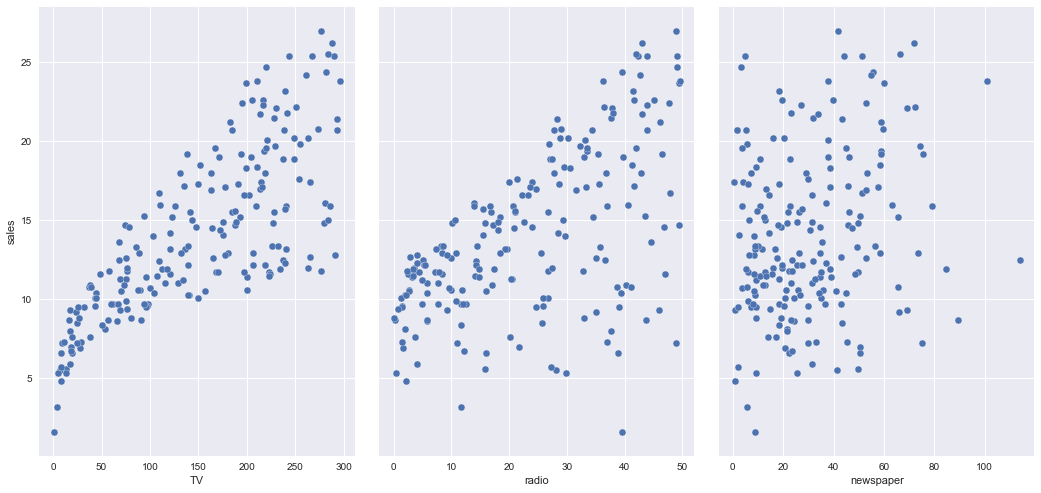

In [4]:
# визуализируем зависимость результата от каждого отдельного признака
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7)

## Простая линейная регрессия

В простой линейной регрессии мы будем прогнозировать ответ используя только один признак.

$y = \beta_0 + \beta_1x$

Что всё это значит?
- $y$ результат
- $x$ признак
- $\beta_0$ свободный член(intercept)
- $\beta_1$ коэффициент для признака x

Вместе, $\beta_0$ и $\beta_1$ называются **параметрами модели**. То есть, узнав/обучив эти значения, мы сможем предсказывать значение продаж с заданным признаком.

## Оцениваем параметры


![Estimating coefficients](images/estimating_coefficients.png)

Отображение параметров на графике:

![Slope-intercept](images/slope_intercept.png)

Посчитаем коэффициенты:

In [5]:
### STATSMODELS ###

# create a fitted model
lm1 = smf.ols(formula='sales ~ TV', data=data).fit()

# print the coefficients
lm1.params


Intercept    7.032594
TV           0.047537
dtype: float64

In [6]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)


7.03259354913
[ 0.04753664]


Да, всё настолько просто!

## А что мы вообще получили?

Как интерпретировать ($\beta_1$)?
- Грубо говоря, инвестиции в ТВ рекламу прямо пропорциональны 0.047537 количеству продаж.
- Дополнительные $1,000 потраченные на ТВ связаны с увеличением проданного товара на 47.537 штук.

Если бы вдруг инвестиции приводили к уменьшению продаж, то ($\beta_1$) был бы отрицательным.

## Предсказываем с моделью

Пускай какой-то магазин собирается потратить **$50,000** на ТВ рекламу. Сколько продаж это принесёт?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [7]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

In [8]:
### STATSMODELS ###

# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})

# predict for a new observation
lm1.predict(X_new)

0    9.409426
dtype: float64

In [9]:
### SCIKIT-LEARN ###

# predict for a new observation
lm2.predict(50)

array([ 9.40942557])

## График

Нарисуем график для каждой из фич:

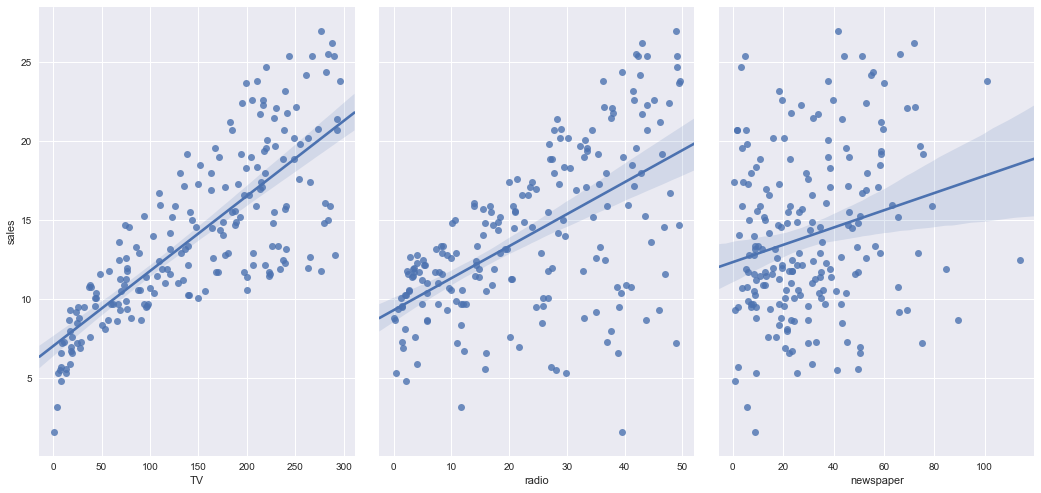

In [10]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')


## Можно ли доверять модели?

Тут мы и встречаемся с компромиссом между смещением и дисперсией.

Посчитаем доверительные коэффициенты для модели:

In [11]:
### STATSMODELS ###

# Считаем доверительные интервалы для модели
lm1.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


Нужно помнить, что у нас лишь определенная выборка из данных, а не все возможные входные данные. Так что гарантированно говорить, что настоящий коэффициент находится в этом интервале нельзя. Так что интервал всё ещё носит вероятностный характер.

95% интервал является наиболее распространенным. Если взять 90%, интервал будет уже, если 99% — наоборот шире.

## Проверка статистических гипотез

Нулевая гипотеза — гипотеза, которая проверяется на согласованность с имеющимися выборочными (эмпирическими) данными. Часто в качестве нулевой гипотезы выступают гипотезы об отсутствии взаимосвязи или корреляции между исследуемыми переменными, об отсутствии различий (однородности) в распределениях (параметрах распределений) в двух и/или более выборках. 


Чуть проще:
- **нулевая гипотеза:** Нет взаимосвязи между ТВ рекламой и продажами (и тогда $\beta_1$ равен 0)
- **альтернативная гипотеза:** Взаимосвязь есть ($\beta_1$ не равны 0)

Как проверить/опровергнуть гипотезу?  
Мы можем отвергнуть нулевую, если 95% в доверительный интервал не входит 0.
P-значение (англ. P-value) — величина, используемая при тестировании статистических гипотез. Фактически это вероятность ошибки при отклонении нулевой гипотезы. (вероятность того что параметр признака = 0)

In [12]:
### STATSMODELS ###

# print the p-values for the model coefficients
lm1.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

Если бы 95% доверительный интервал **включал 0**, p-value для этого коэффициента был бы **больше чем 0.05**. 
В нашем случае, значение сильно меньше 0.05, и мы можем **поверить** что взаимосвязь между TV рекламой и продажами есть.

## Насколько хорошо модель подходит к данным?

Чтобы оценить это, используем **R-squared** значение(коэффициент детерминации). При оценке регрессионных моделей это интерпретируется как соответствие модели данным. Для приемлемых моделей предполагается, что коэффициент детерминации должен быть хотя бы не меньше 50 % (в этом случае коэффициент множественной корреляции превышает по модулю 70 %). Модели с коэффициентом детерминации выше 80 % можно признать достаточно хорошими (коэффициент корреляции превышает 90 %). Значение коэффициента детерминации 1 означает функциональную зависимость между переменными.

![R-squared](images/r_squared.png)

Посчитаем R-squared для нашей простой модели.

In [13]:
### STATSMODELS ###

# print the R-squared value for the model
lm1.rsquared

0.61187505085007099

In [14]:
### SCIKIT-LEARN ###

# print the R-squared value for the model
lm2.score(X, y)

0.61187505085007099

На самом деле, нельзя однозначно сказать, "хорошее" это значение или "плохое". Наиболее полезно это значение для **сравнения разных моделей**.

## Множественная линейная регрессия

Простую линейную регрессию легко расширить с использованием большего числа признаков:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Каждый $x$ означает разный признак. В нашем случае:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Опять, посчитаем коэффициенты:

In [15]:
### STATSMODELS ###

# считаем модель
lm1 = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()

lm1.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

In [16]:
### SCIKIT-LEARN ###

feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

# инициализируем и считаем модель
lm2 = LinearRegression()
lm2.fit(X, y)

print(lm2.intercept_)
print(lm2.coef_)

2.93888936946
[ 0.04576465  0.18853002 -0.00103749]


In [17]:
# отобразим значения вместе с переменными
list(zip(feature_cols, lm2.coef_))

[('TV', 0.045764645455397587),
 ('radio', 0.18853001691820465),
 ('newspaper', -0.0010374930424762729)]

Из Statsmodels можно получить ещё интересного о модели:

In [18]:
### STATSMODELS ###

# выводим больше информации о модели
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 19 Oct 2017   Prob (F-statistic):           1.58e-96
Time:                        16:17:21   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Что можно отсюда почерпнуть?

- У ТВ и радио очень низкие **p-values**, а у газет нет. Мы можем отрицать нулевую гипотезу для TV and Radio, для газет не можем.
- Коэффициент при газетах оказался слегка отрицательным. Но мы не должны придавать этому значения, так как нулевая гипотеза для газет не отвергнута.
- У этой модели **R-squared** (0.897) больше чем у простой, она лучше "ложится" на данные.

## Выбор признаков

Как определить **какие признаки выбрать** для линейной модели? Один из вариантов:
- Пробуем разные модели, оставляем признаки с низкими p-values
- Смотрим на значение R-squared и радуемся его увеличению.
- Погружаемся в предметную область 

Какие **недостатки** такого подхода?
- Если признаки не независимы между собой, R-squared и p-values становятся менее надёжными.
- Основная проблема применения R-squared заключается в том, что его значение увеличивается (не уменьшается) от добавления в модель новых переменных, даже если эти переменные никакого отношения к объясняемой переменной не имеют! Поэтому сравнение моделей с разным количеством факторов с помощью коэффициента детерминации, вообще говоря, некорректно.

In [19]:
### STATSMODELS ###

# Только ТВ и радио
lm1 = smf.ols(formula='sales ~ TV + radio', data=data).fit()
lm1.rsquared

0.89719426108289557

In [20]:
# Добавили газеты
lm1 = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm1.rsquared

0.89721063817895219


Для того, чтобы была возможность сравнивать модели с разным числом факторов так, чтобы число регрессоров (факторов) не влияло на статистику {\displaystyle R^{2}} R^2 обычно используется скорректированный коэффициент детерминации, в котором используются несмещённые оценки дисперсий и который даёт штраф за дополнительно включённые факторы.

Также, не забываем про кросс-валидацию.

## Метрики оценки модели


**Mean Absolute Error** 

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error**

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** 

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Попробуем их посчитать для случайных данных

In [21]:
# define true and predicted response values
y_true = [100, 50, 30, 20]
y_pred = [90, 50, 50, 30]

# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_true, y_pred))
print(metrics.mean_squared_error(y_true, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

10.0
150.0
12.2474487139


## Вычисление модели с разделением данных(на test/train).

Пора окончательно узнать, нужны ли нам газеты через RMSE:

In [22]:
# include Newspaper
X = data[['TV', 'radio', 'newspaper']]
y = data.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm2 = LinearRegression()
lm2.fit(X_train, y_train)
y_pred = lm2.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


In [23]:
# exclude Newspaper
X = data[['TV', 'radio']]
y = data.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm2 = LinearRegression()
lm2.fit(X_train, y_train)
y_pred = lm2.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.38790346994


## Категориальные признаки

Создадим фичу с размером магазина:

In [24]:
# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,radio,newspaper,sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


scikit-learn требует все входные данные в числовом формате. У нас всего 2 категории, создадим ещё одну переменную:

In [25]:
# create a new Series called Size_large
data['Size_large'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,radio,newspaper,sales,Size,Size_large
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


Добавим признак **Size_large**:

In [26]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'Size_large']
X = data[feature_cols]
y = data.sales

# instantiate, fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print coefficients
list(zip(feature_cols, lm2.coef_))

[('TV', 0.045719820924362747),
 ('radio', 0.18872814313427855),
 ('newspaper', -0.0010976794483516517),
 ('Size_large', 0.057423850854827568)]

## А если категорий больше двух?

Создадим признак **Area**, и рандомно зададим значения **rural, suburban, or urban**:

In [27]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,radio,newspaper,sales,Size,Size_large,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


Теперь проблема в том, что мы не можем просто раздать значения0=rural, 1=suburban, 2=urban , так как они значимы относительно друг друга(urban больше rural в 2 раза???).
(Иногда такой подход возможен, если категории действительно представляют собой упорядченную последовательность отношений, например 1 - совсем не согласен, 2 - несогласен, 3 - нейтрален, 4 - согласен и тд).

Воспользуемся pd.get_dummies для решения этой проблемы.

In [28]:
# create three dummy variables using get_dummies
pd.get_dummies(data.Area, prefix='Area').head()

,Area_rural,Area_suburban,Area_urban
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,1,0


На самом деле нам хватит и двух битовых переменных, чтобы отобразить 3 значения:


In [29]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]
area_dummies.head()

,Area_suburban,Area_urban
1,0,0
2,0,1
3,0,0
4,0,1
5,1,0


Интерпретируем это так:
- **rural**  =  Area_suburban=0 and Area_urban=0
- **suburban** = Area_suburban=1 and Area_urban=0
- **urban** = Area_suburban=0 and Area_urban=1

Теперь можно посчитать модель:

In [30]:
# concatenate the dummy variable columns onto the DataFrame
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,radio,newspaper,sales,Size,Size_large,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


In [31]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'Size_large', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
list(zip(feature_cols, lm2.coef_))

[('TV', 0.045744010363313721),
 ('radio', 0.18786669552525823),
 ('newspaper', -0.0010876977267108567),
 ('Size_large', 0.07739660749747905),
 ('Area_suburban', -0.10656299015958608),
 ('Area_urban', 0.2681380216522013)]

## Немного о кросс-валидации

In [51]:
# cross-validation example
from sklearn.model_selection import cross_val_score, KFold
?cross_val_score()

In [64]:
lm3 = LinearRegression()
cross_val_score(lm3, X, y, cv = 5, verbose=1).mean()

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


0.88534765343483435

In [65]:
kf = KFold(n_splits=3, shuffle=True)
cross_val_score(lm3, X, y, cv = kf, verbose=1, scoring="neg_mean_squared_error").mean()

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


-2.9191647389621465